- remove duplicate, no duplicate
- checked the correlation between time and passfail, no strong correlation
- missing data
- outliers
- normality
- multicollinearity
- correlation
- feature selection
- create new features
- labeling
- modeling
- hyper parameter tuning

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import variance
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [115]:
all_df = pd.read_csv("C:/Users/user/Desktop/UCI SECOM dataset/uci-secom.csv")
all_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [116]:
all_df.shape

(1567, 592)

In [117]:
# remove row duplicates
all_df.drop_duplicates()
all_df.shape

(1567, 592)

In [118]:
# remove column duplicates
all_df.T.drop_duplicates().T
all_df.shape

(1567, 592)

In [119]:
# データ分割

columnList = all_df.columns.to_list()
columnList.remove('Pass/Fail')
columnList.remove('Time')

X = pd.DataFrame(all_df.loc[:, columnList])
y = pd.DataFrame(all_df.loc[:, ['Pass/Fail']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=939)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1253, 590)
(1253, 1)
(314, 590)
(314, 1)


# データ可視化

In [120]:
X_train = X_train.sort_index()
y_train = y_train.sort_index()

In [121]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077


In [122]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1248.000000,1248.000000,1240.000000,1240.000000,1240.000000,1240.0,1240.000000,1246.000000,1252.000000,1252.000000,...,487.000000,487.000000,1252.000000,1252.000000,1252.000000,1252.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,3014.132380,2494.926899,2200.243429,1391.252669,4.019431,100.0,101.216149,0.121672,1.462894,-0.000386,...,0.005426,97.597681,0.500148,0.015203,0.003813,3.042414,0.021647,0.016618,0.005320,98.735522
std,73.864124,79.433984,30.265396,437.749342,54.638544,0.0,6.268219,0.009973,0.073744,0.014980,...,0.003179,90.331949,0.003417,0.014046,0.003019,2.912994,0.012575,0.009066,0.002937,94.453587
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.480000,0.006800,0.001700,1.366700,-0.016900,0.003200,0.001000,0.000000
25%,2967.497500,2451.452500,2180.700000,1081.857925,1.016000,100.0,98.016925,0.121100,1.410875,-0.010425,...,0.003400,46.436900,0.497900,0.011600,0.003100,2.305800,0.013700,0.010600,0.003300,44.175400
50%,3011.630000,2499.195000,2201.066700,1283.370100,1.307600,100.0,101.539450,0.122400,1.461500,-0.000550,...,0.004700,72.200200,0.500200,0.013800,0.003600,2.763950,0.020700,0.014900,0.004700,71.778000
75%,3056.422500,2538.415000,2217.913900,1590.259700,1.518800,100.0,104.615600,0.123800,1.516600,0.008525,...,0.006500,113.873650,0.502400,0.016600,0.004100,3.325925,0.027600,0.020500,0.006400,114.287800
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [126]:
temp = pd.DataFrame(y_train['Pass/Fail'].value_counts()/y_train['Pass/Fail'].count())
temp

,Pass/Fail
-1,0.931365
1,0.068635


<AxesSubplot:ylabel='Pass/Fail'>

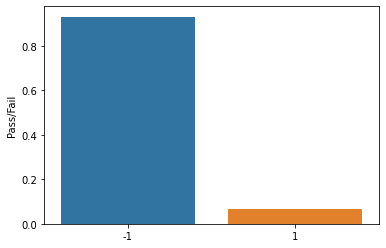

In [127]:
# 目的変数の分布
sns.barplot(x= temp.index,y='Pass/Fail', data=temp)

<AxesSubplot:xlabel='0', ylabel='Count'>

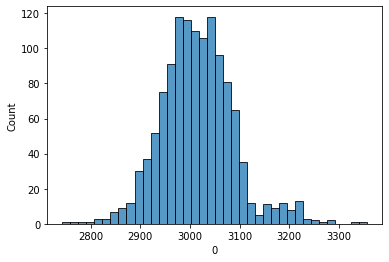

In [128]:
sns.histplot(X_train['0'])

<AxesSubplot:xlabel='5', ylabel='Count'>

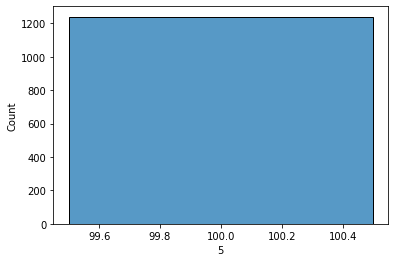

In [129]:
sns.histplot(X_train['5'])

<AxesSubplot:xlabel='109', ylabel='Count'>

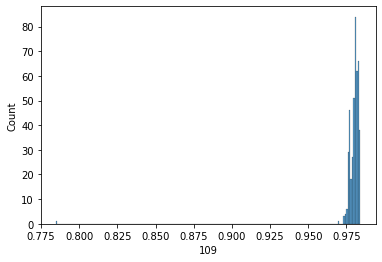

In [133]:
sns.histplot(X_train['109'])

In [142]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,2770.40,2549.42,2204.2889,2637.9989,1.5549,100.0,86.1089,0.1234,1.2811,0.0037,...,0.0042,127.3154,0.5009,0.0155,0.0036,3.0997,0.0105,0.0133,0.0042,127.3154
1561,2951.14,2326.59,2212.6334,1081.5662,1.0096,100.0,113.4278,0.1253,1.4492,-0.0134,...,0.0051,46.4573,0.4965,0.0118,0.0032,2.3817,0.0320,0.0148,0.0051,46.4573
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231


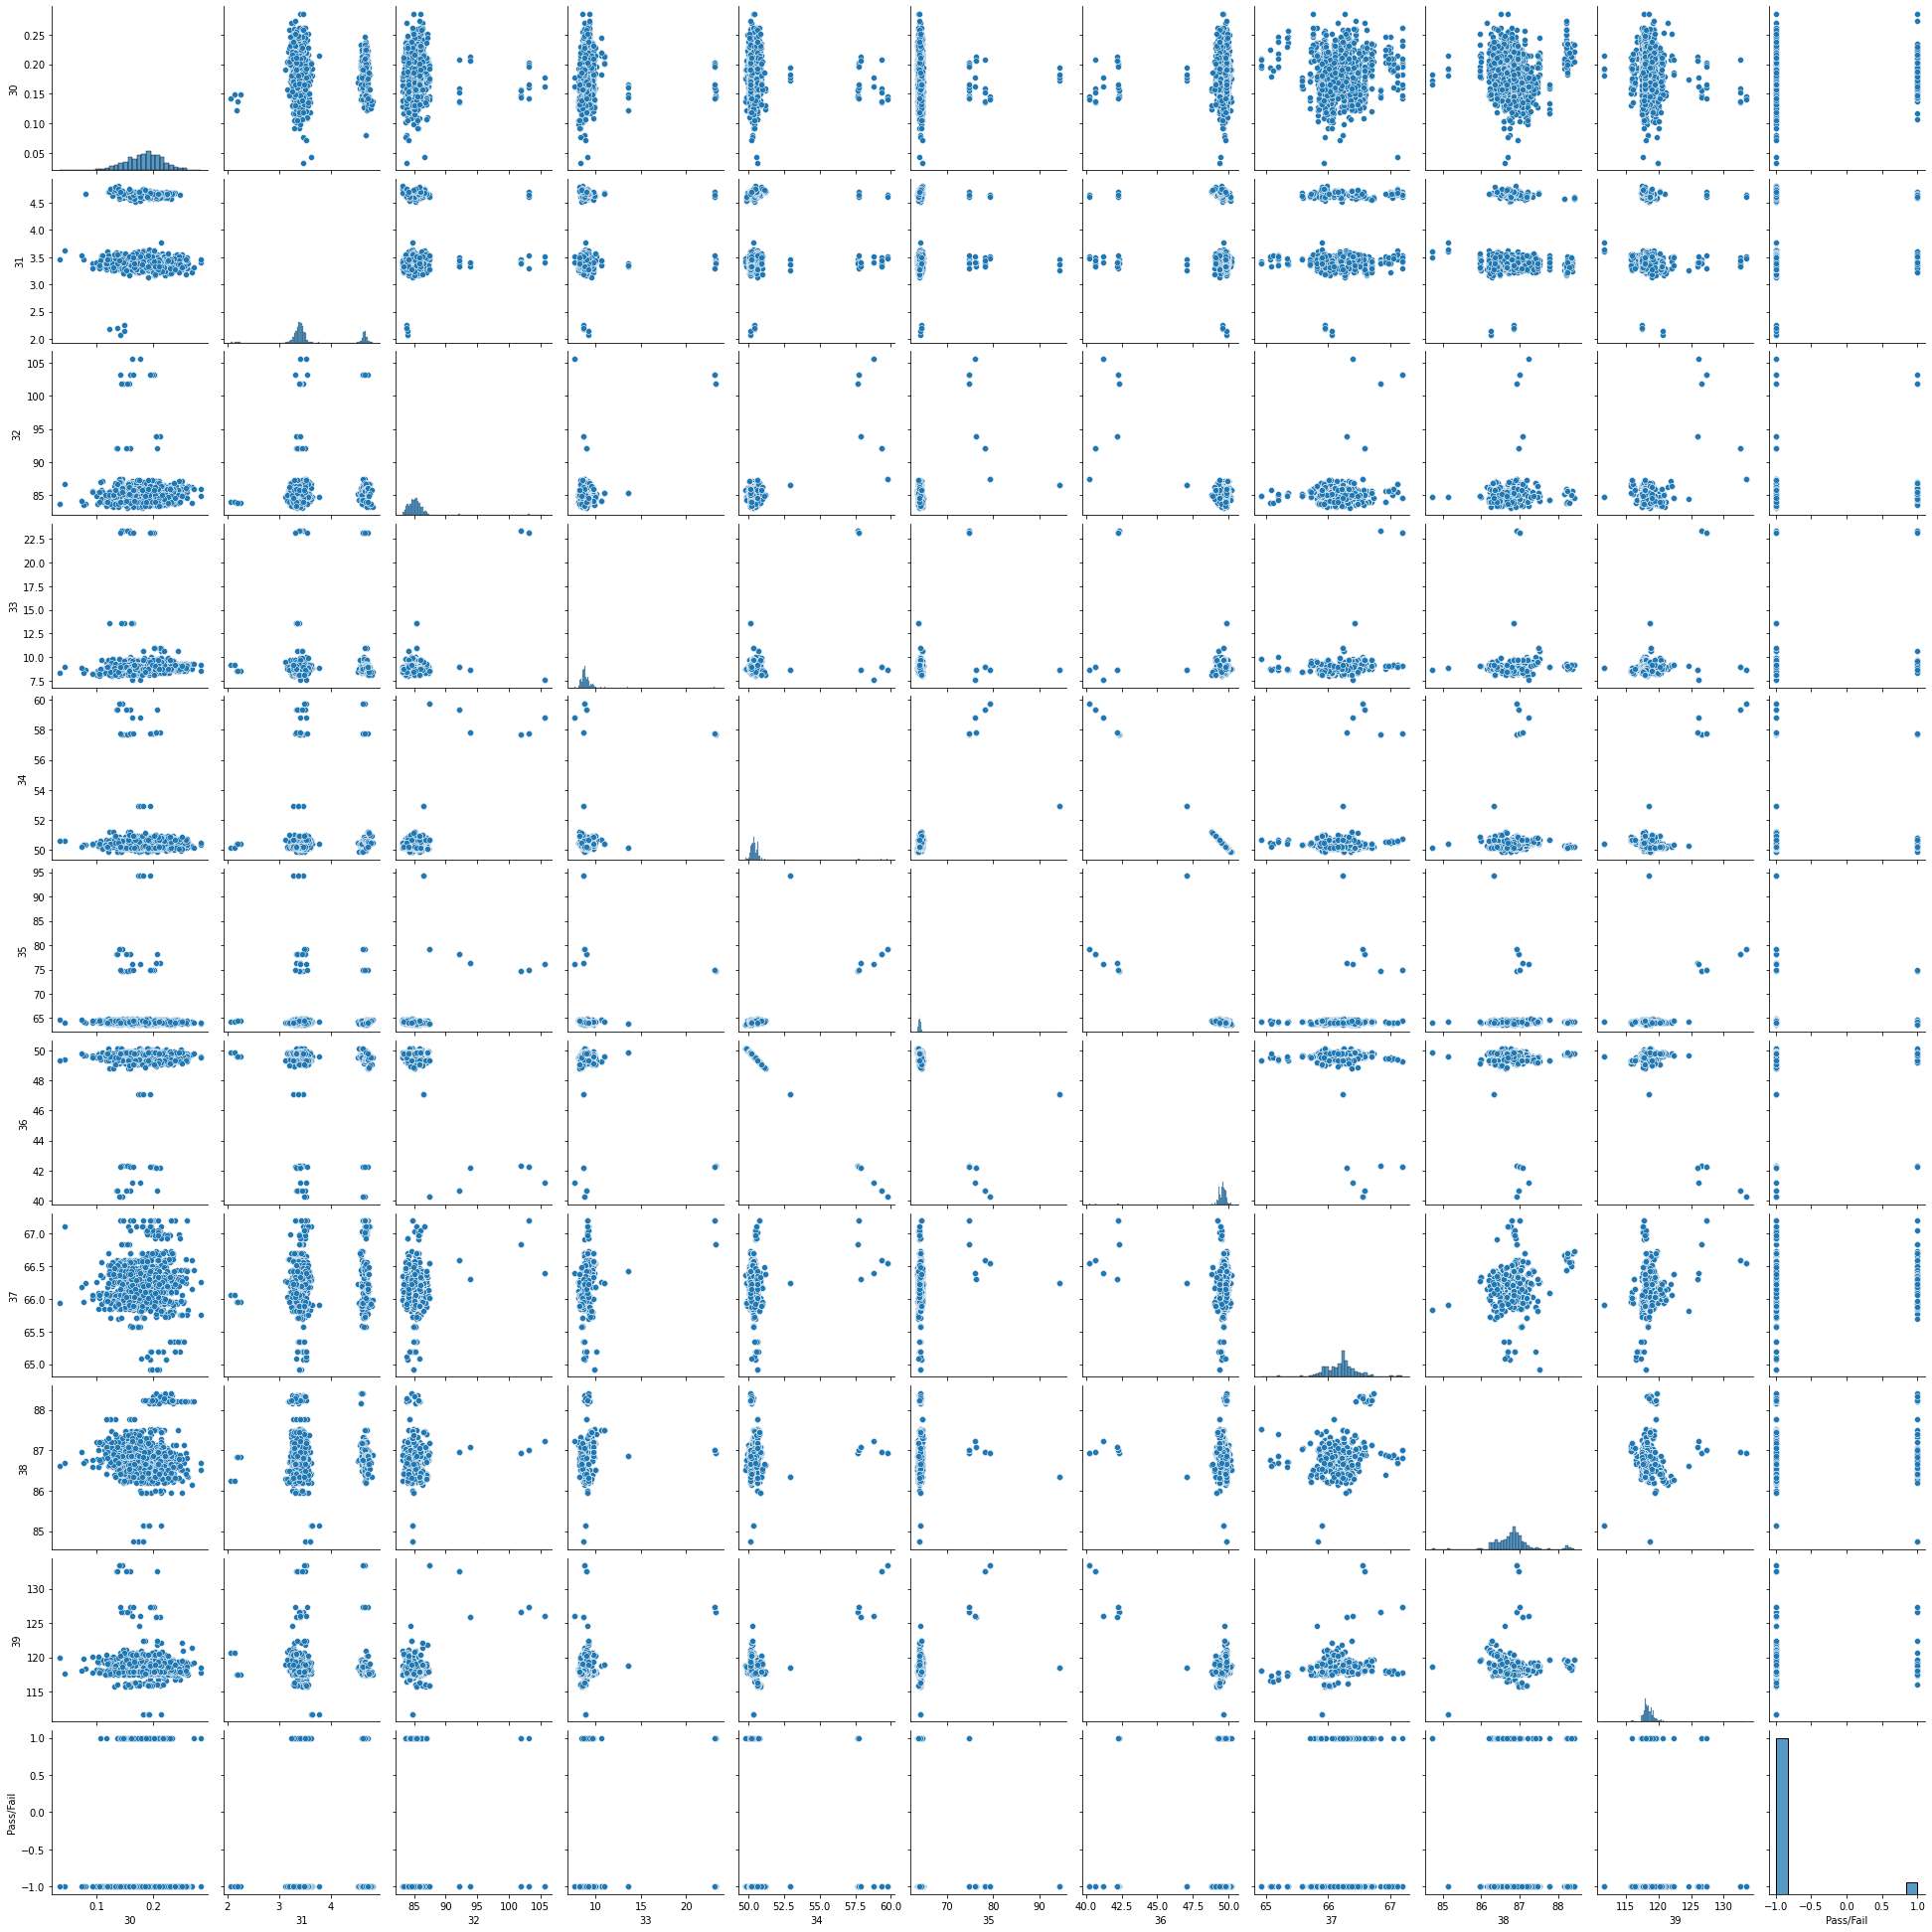

In [148]:
temp = X_train.iloc[:,30:40]
temp = pd.concat([temp, y_train], axis=1)
sns.pairplot(temp)

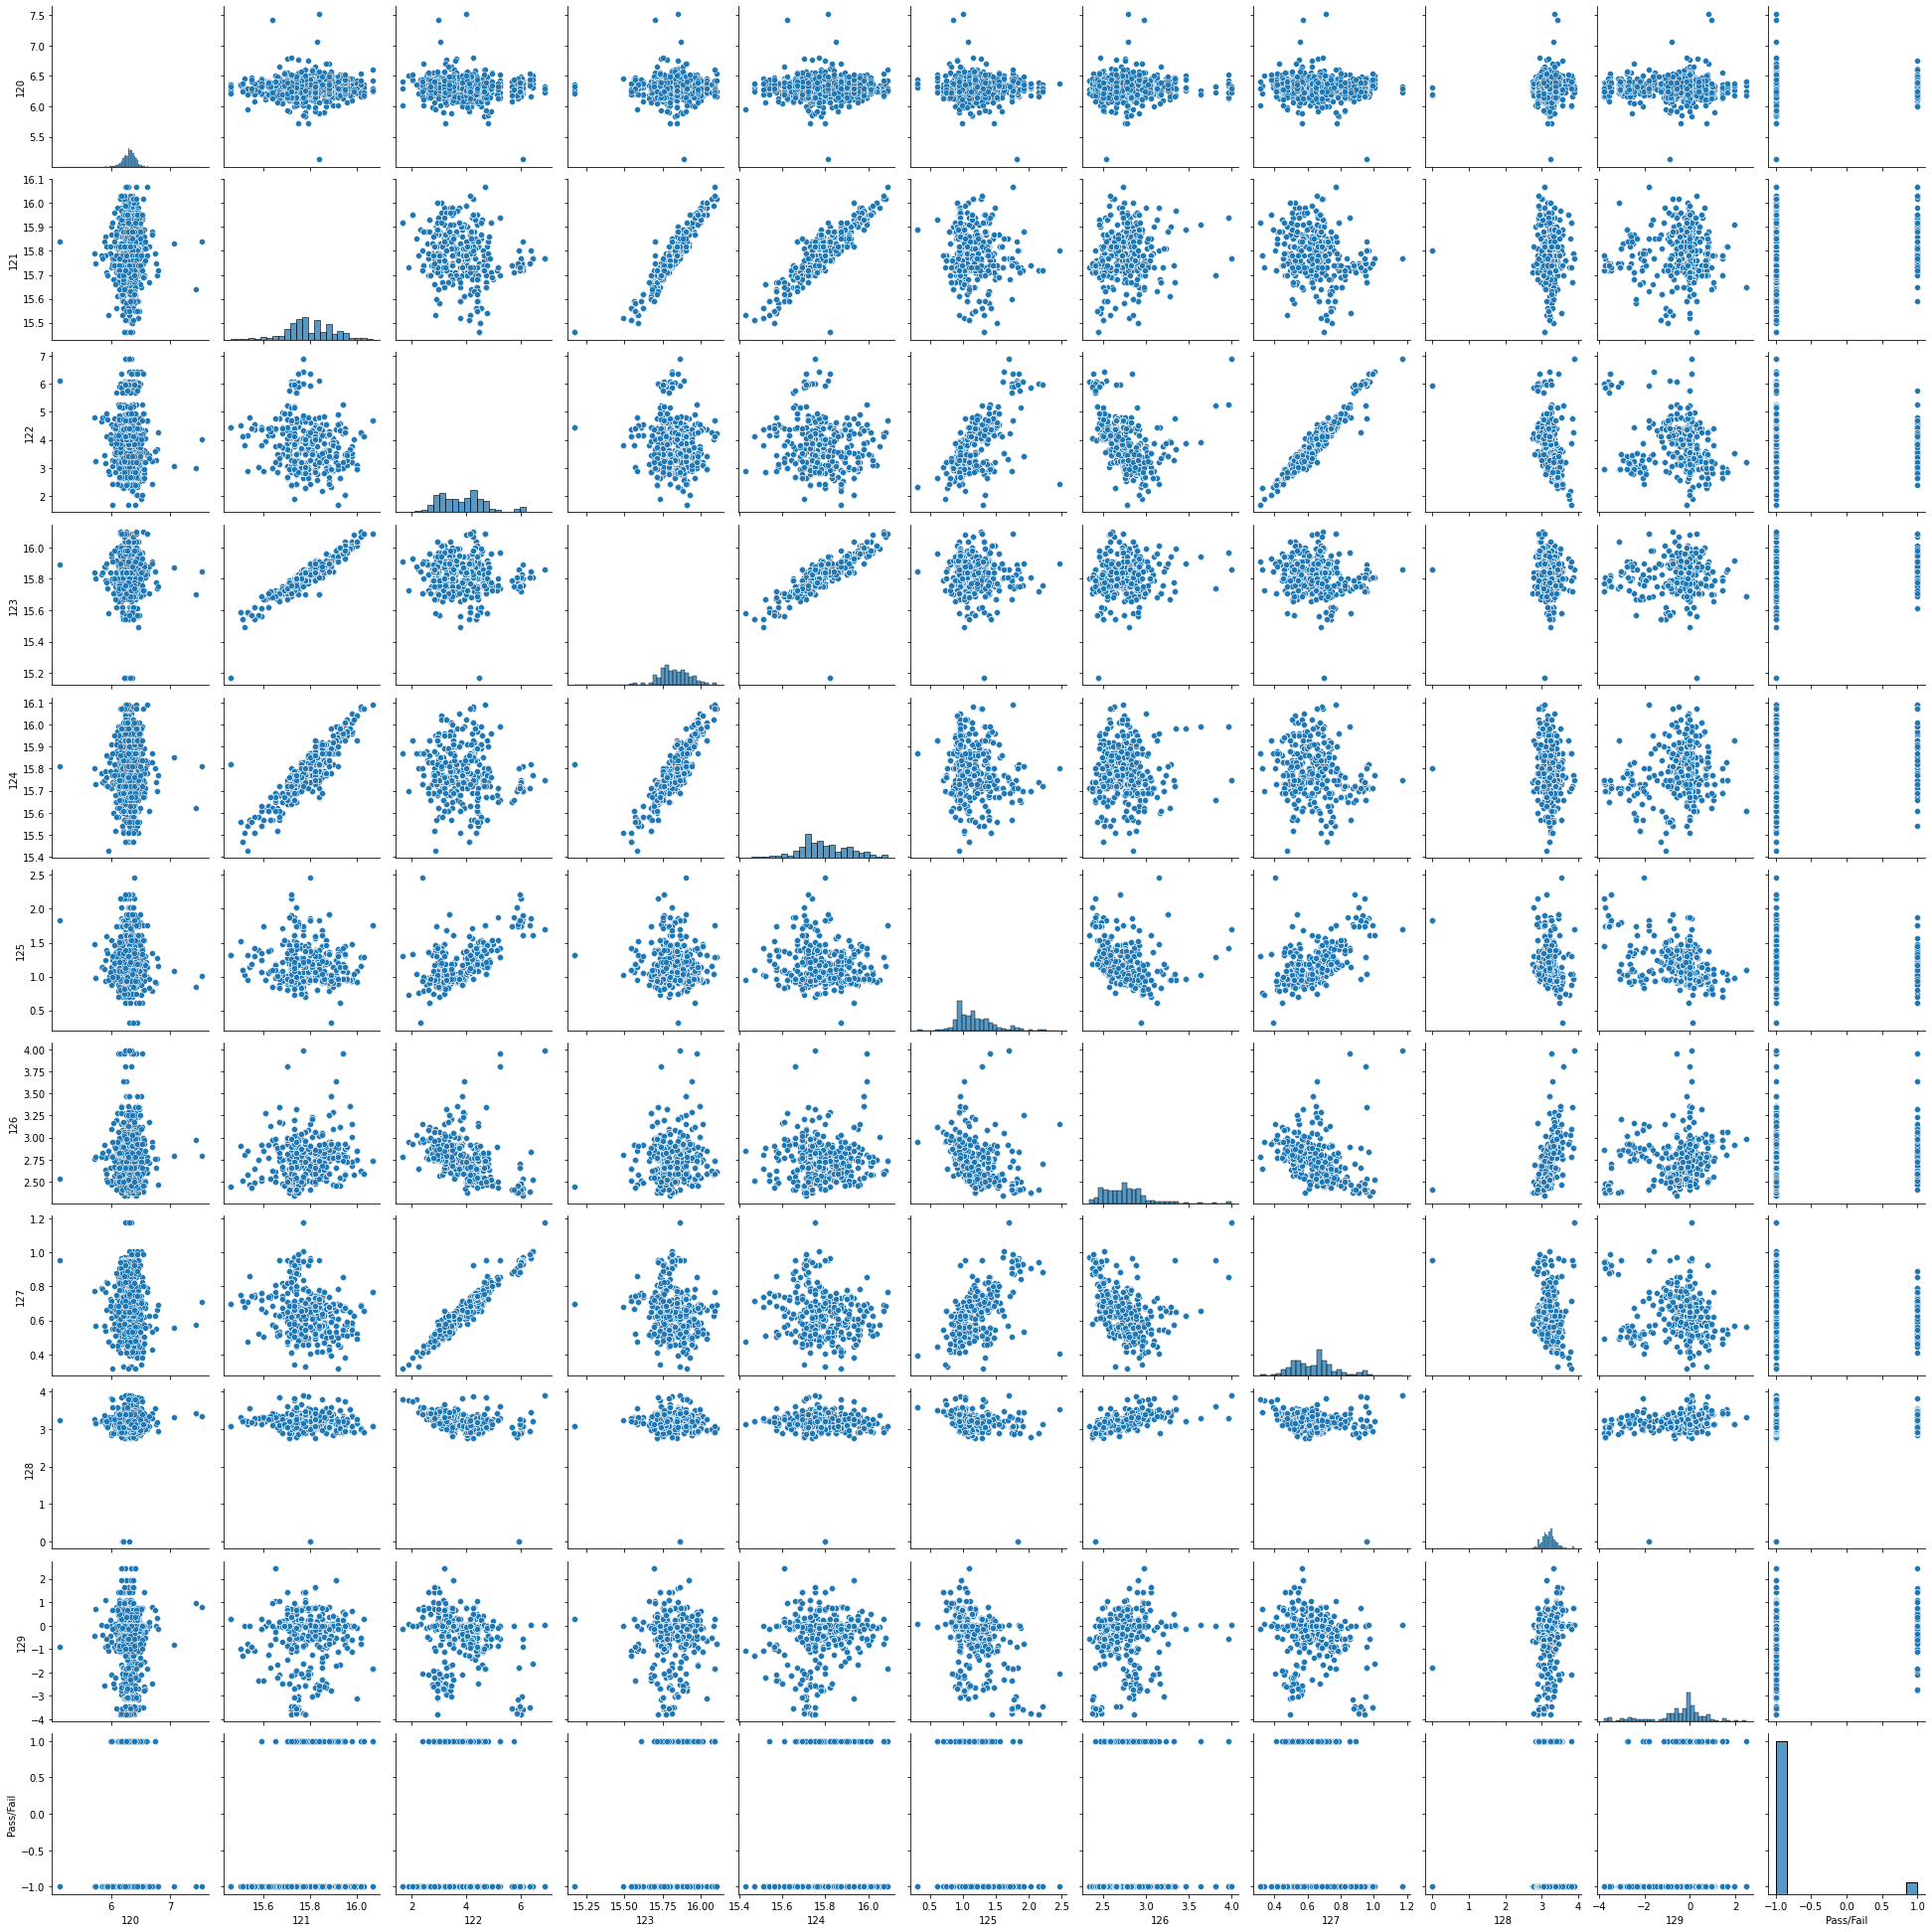

In [149]:
temp = X_train.iloc[:,120:130]
temp = pd.concat([temp, y_train], axis=1)
sns.pairplot(temp)

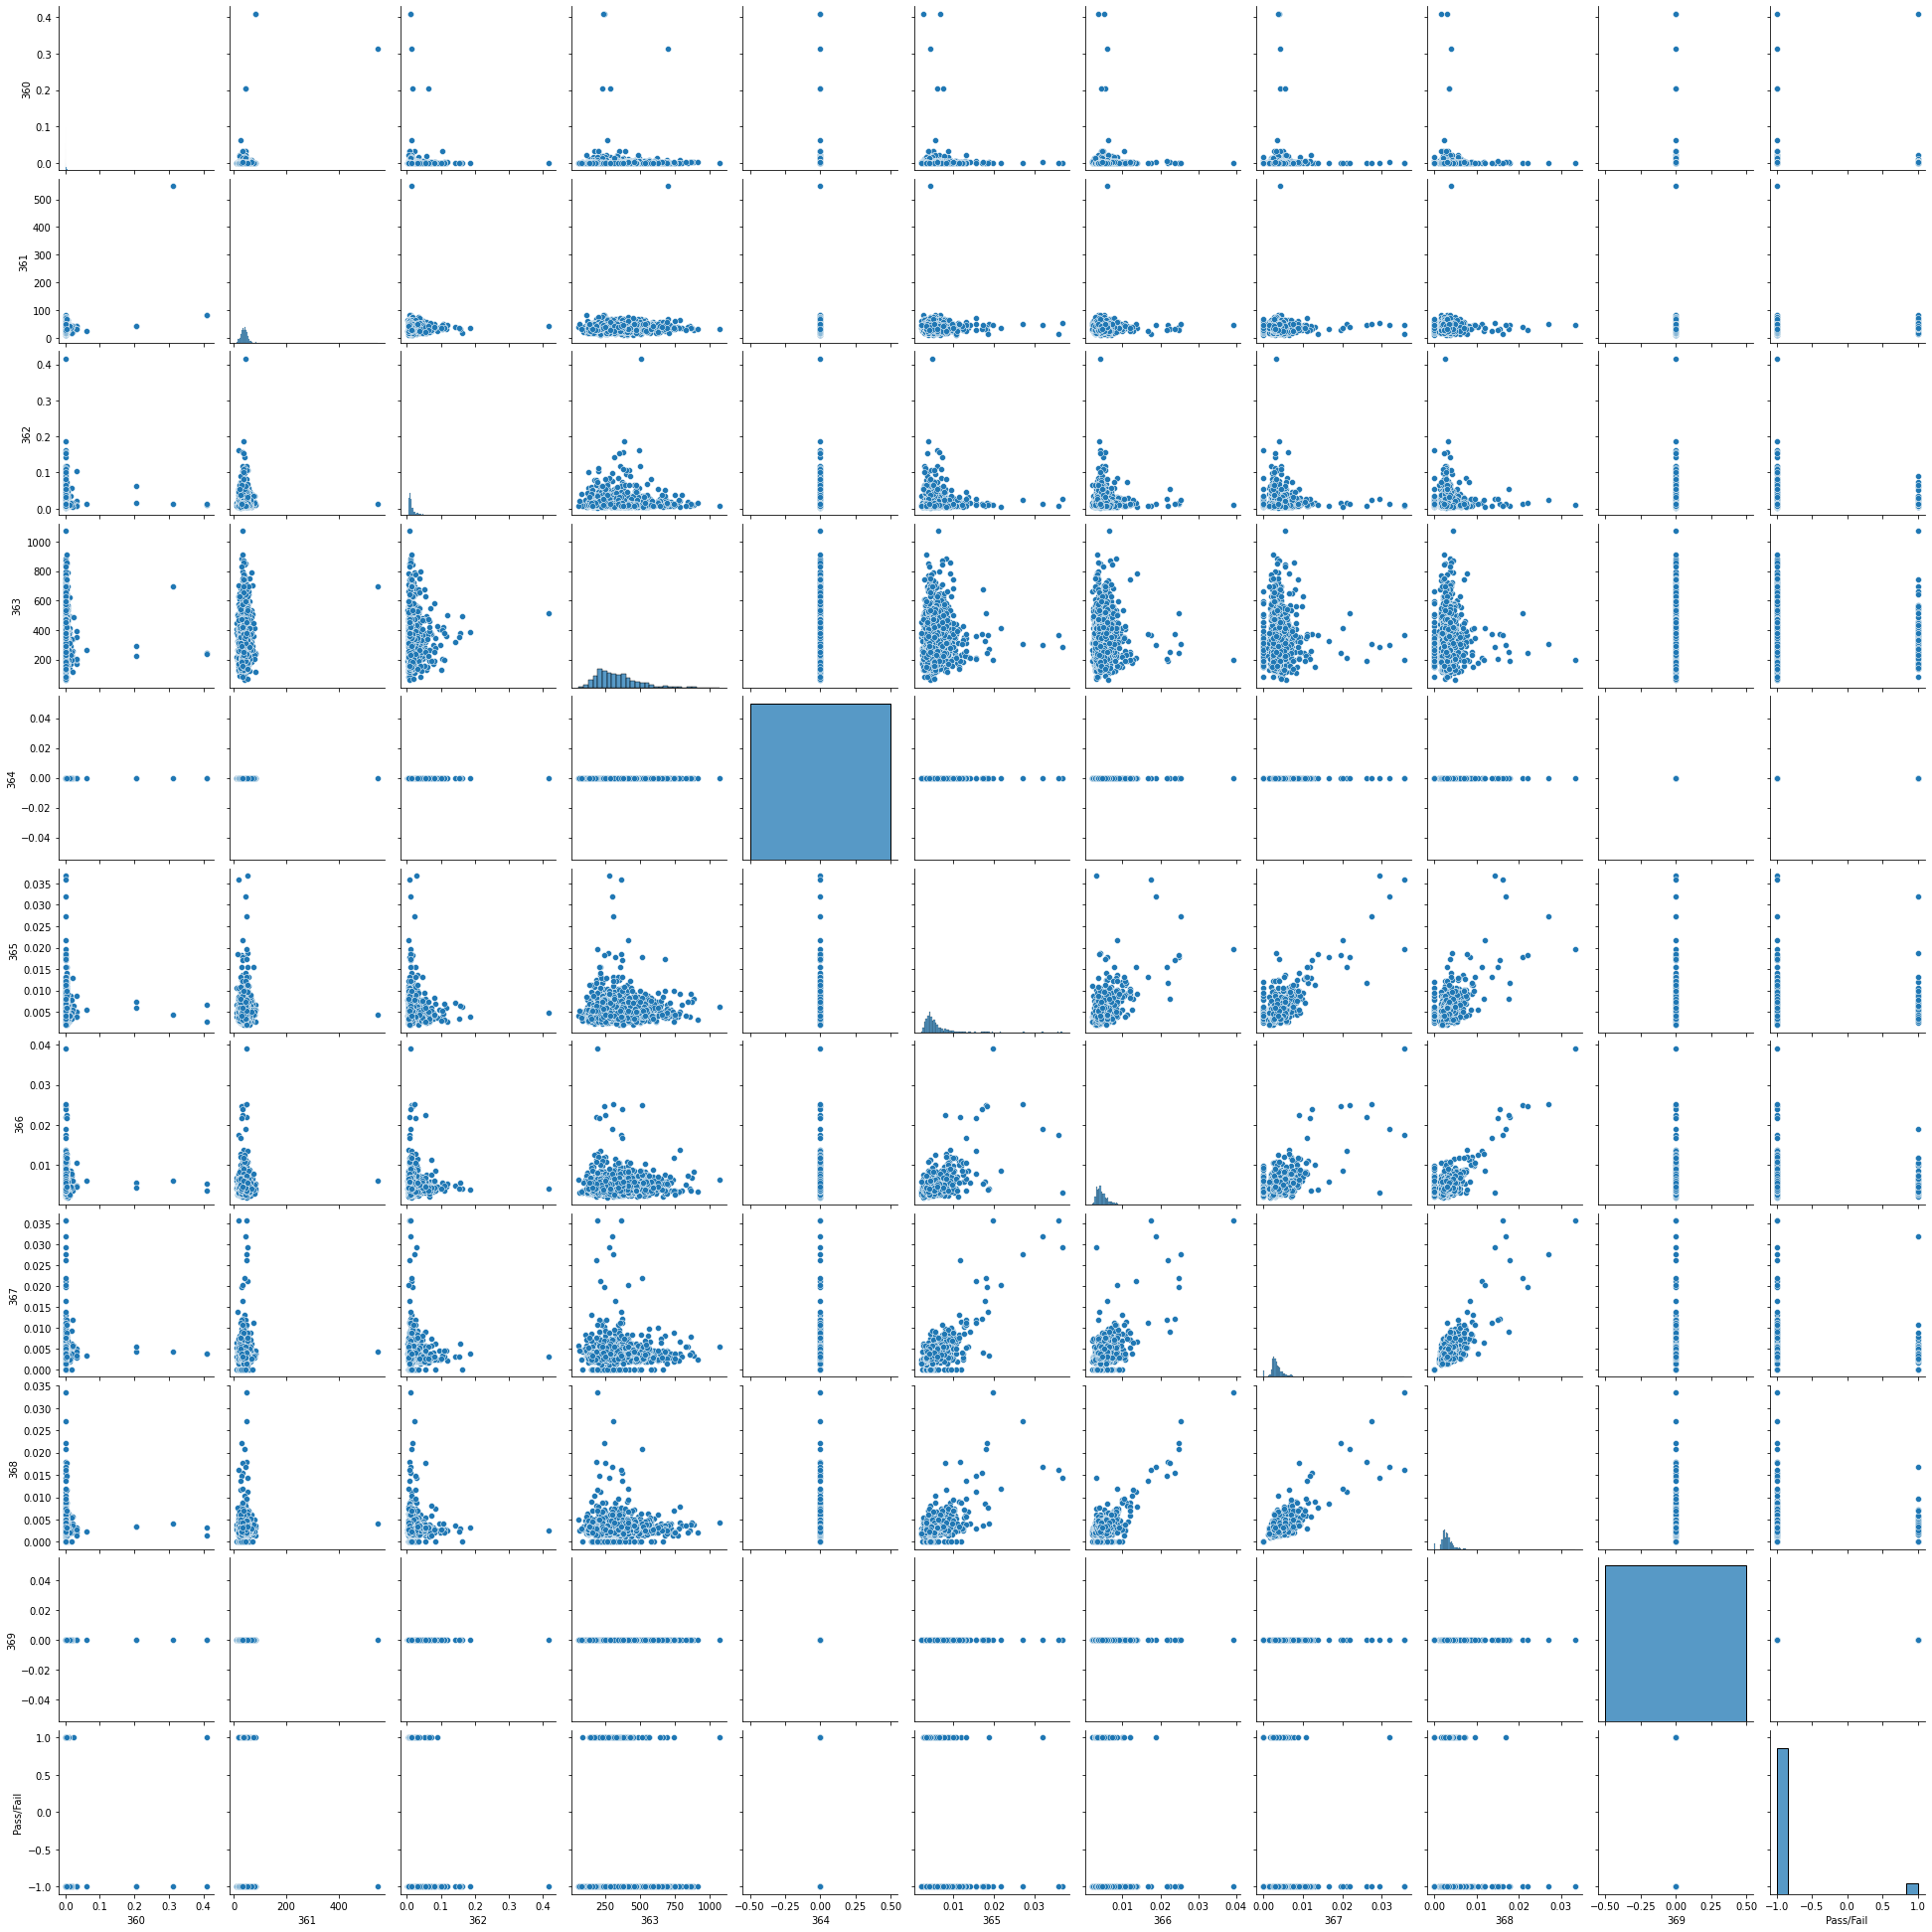

In [150]:
temp = X_train.iloc[:,360:370]
temp = pd.concat([temp, y_train], axis=1)
sns.pairplot(temp)

# 欠損値処理

In [151]:
total_null = X_train.isnull().sum().sort_values(ascending=False)
percent_null = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
missing_data.head(50)

,Total,Percent
158,1147,0.915403
292,1147,0.915403
157,1147,0.915403
293,1147,0.915403
220,1072,0.855547
358,1072,0.855547
85,1072,0.855547
492,1072,0.855547
383,817,0.652035
384,817,0.652035


<AxesSubplot:>

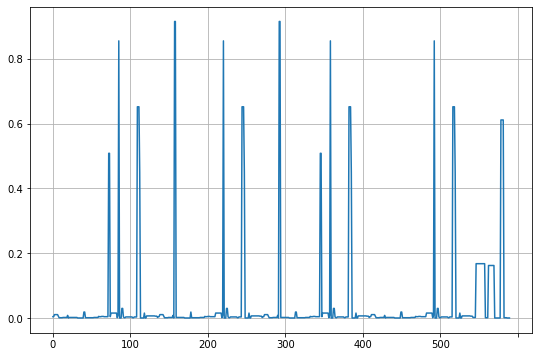

In [152]:
#null count plot
null_count = X_train.isnull().sum()/X_train.isnull().count()
null_count.plot(figsize=(9,6), grid=True)

<AxesSubplot:>

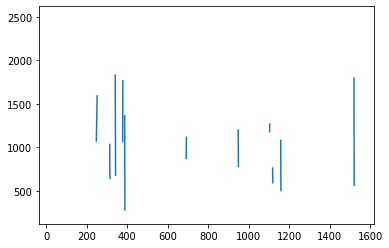

In [153]:
# 欠損値91%
X_train['158'].plot()

<AxesSubplot:>

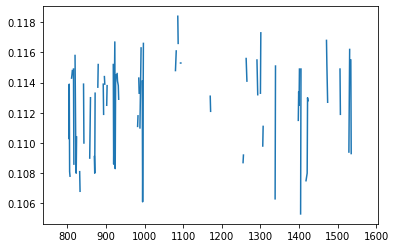

In [154]:
# 欠損値86%
X_train['85'].plot()

<AxesSubplot:>

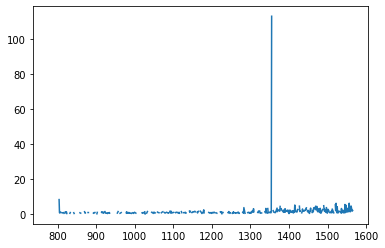

In [155]:
# 欠損値65%
X_train['517'].plot()

<AxesSubplot:>

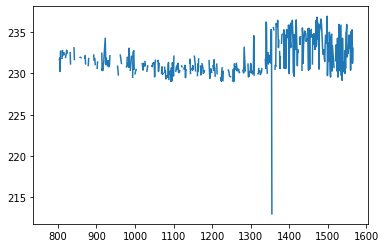

In [156]:
# 欠損値65%
X_train['111'].plot()

In [157]:
# 欠損値が8割以上列を削除
del_null_col_df = X_train.drop(missing_data[missing_data['Percent'] > 0.8].index, axis=1)
print('before: {}'.format(X_train.shape) + ', after: {}'.format(del_null_col_df.shape))


before: (1253, 590), after: (1253, 582)


In [215]:
# 他の欠損値ある列の欠損値を中間値で埋める
X_train_nafilled = del_null_col_df.fillna(del_null_col_df.median())
X_train_nafilled.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0047,72.2002,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,0.0047,72.2002,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077


<AxesSubplot:>

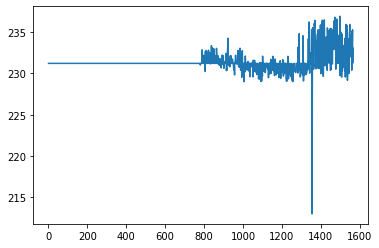

In [166]:
X_train_nafilled['111'].plot()

In [167]:
X_train_nafilled.isnull().sum().value_counts()

0    582
dtype: int64

In [162]:
# 検証用データの欠損値も処理する

# 欠損値が8割以上列を削除
X_test_nafilled = X_test.drop(missing_data[missing_data['Percent'] > 0.8].index, axis=1)
print('before: {}'.format(X_test.shape) + ', after: {}'.format(X_test_nafilled.shape))


before: (314, 590), after: (314, 582)


In [163]:
# 他の欠損値ある列の欠損値を訓練用データの中間値で埋める（データリークを防ぐため）
X_test_nafilled = X_test_nafilled.fillna(del_null_col_df.median())
X_test_nafilled.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
1432,3001.45,2481.72,2162.5556,1041.0369,1.4305,100.0,100.4111,0.1238,1.6217,-0.0088,...,0.0059,120.6365,0.5011,0.0125,0.0036,2.4872,0.0157,0.0190,0.0059,120.6365
339,3106.85,2453.47,2197.2333,1435.1460,0.9740,100.0,104.8733,0.1226,1.5971,-0.0160,...,0.0047,72.2002,0.5004,0.0140,0.0030,2.7978,0.0270,0.0114,0.0038,42.1428
1191,3105.06,2266.00,2241.1778,1521.1987,1.3349,100.0,98.5900,0.1217,1.5016,-0.0011,...,0.0047,72.2002,0.5027,0.0106,0.0031,2.1084,0.0262,0.0104,0.0033,39.5528
720,3003.13,2498.30,2227.2444,1329.8933,0.9480,100.0,107.8778,0.1220,1.4374,-0.0128,...,0.0047,72.2002,0.4944,0.0184,0.0044,3.7179,0.0121,0.0121,0.0040,100.3091
505,2984.05,2600.07,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.5634,-0.0059,...,0.0047,72.2002,0.4995,0.0100,0.0027,1.9969,0.0048,0.0226,0.0079,474.0812


In [164]:
X_test_nafilled.isnull().sum().value_counts()

0    582
dtype: int64

# データ整理

In [218]:
varThres = VarianceThreshold(threshold=0)
varThres.fit(X_train_nafilled)


X_train_nafilled = X_train_nafilled.loc[:, varThres.get_support()]
X_test_nafilled = X_test_nafilled.loc[:, varThres.get_support()]

X_train_nafilled

,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.0047,72.2002,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5287,0.0167,0.0055,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.5816,-0.0270,0.0105,...,0.0047,72.2002,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077


In [191]:
count = 0
for i in X_train_nafilled.columns:
    if 0 < X_train_nafilled[i].value_counts().shape[0] <= 2:
        print(i, X_train_nafilled[i].value_counts().shape[0])
        count = count + 1

print(count)

5 1
13 1
42 1
49 1
52 1
69 1
74 2
97 1
141 1
149 1
178 1
179 1
186 1
189 1
190 1
191 1
192 1
193 1
194 1
206 2
209 2
226 1
229 1
230 1
231 1
232 1
233 1
234 1
235 1
236 1
237 1
240 1
241 1
242 1
243 1
256 1
257 1
258 1
259 1
260 1
261 1
262 1
263 1
264 1
265 1
266 1
276 1
284 1
313 1
314 1
315 1
322 1
325 1
326 1
327 1
328 1
329 1
330 1
342 2
347 2
364 1
369 1
370 1
371 1
372 1
373 1
374 1
375 1
378 1
379 1
380 1
381 1
394 1
395 1
396 1
397 1
398 1
399 1
400 1
401 1
402 1
403 1
404 1
414 1
422 1
449 1
450 1
451 1
458 1
461 1
462 1
463 1
464 1
465 1
466 1
478 2
481 1
498 1
501 1
502 1
503 1
504 1
505 1
506 1
507 1
508 1
509 1
512 1
513 1
514 1
515 1
528 1
529 1
530 1
531 1
532 1
533 1
534 1
535 1
536 1
537 1
538 1
122


In [33]:
filled_null_df_notime = filled_null_df.drop('Time', axis=1)
for i in filled_null_df_notime.columns:
    if filled_null_df_notime[i].std() == 0:
        filled_null_df_notime = filled_null_df_notime.drop(i, axis=1)

In [34]:
for i in filled_null_df_notime.columns:
    if 0 < filled_null_df_notime[i].value_counts().shape[0] <= 2:
        print(i, filled_null_df_notime[i].value_counts().shape[0])

74 2
206 2
209 2
342 2
347 2
478 2
Pass/Fail 2


In [21]:
#remove low variance columns

In [22]:
#extract columns with too large outliers, check their fail ratio, 
# if most of them are pass, treat those outliers as measurement error



# 特徴量抽出

In [35]:
X = filled_null_df_notime.drop(['Pass/Fail'], axis=1)
y = filled_null_df_notime['Pass/Fail']

In [36]:
fs = SelectKBest(score_func=f_classif, k=10)
X_selected = fs.fit_transform(X, y)

print(X_selected.shape)

(1567, 10)


In [48]:
selectkbestmodel = fs.fit(X, y)
pd.DataFrame(selectkbestmodel.pvalues_)[0].sort_values(ascending=True).head(10)

54     5.341076e-10
95     1.784028e-09
401    1.690389e-07
287    2.033597e-07
344    1.925073e-06
347    1.003005e-05
343    1.499040e-05
19     1.726202e-05
348    1.749182e-05
26     2.196299e-05
Name: 0, dtype: float64

In [37]:
X_selected = pd.DataFrame(X_selected)
total = pd.concat([X_selected, y], axis=1)
total

,0,1,2,3,4,5,6,7,8,9,Pass/Fail
0,-5419.00,64.2333,-1.7264,-0.0042,0.0215,18.7673,33.1562,10.0503,2.7073,64.6707,-1
1,-5441.50,68.4222,0.8073,-0.0045,0.0142,10.4383,2.2655,8.6336,5.7093,141.4365,-1
2,-5447.75,67.1333,23.8245,-0.0026,0.0105,10.3162,29.1663,14.2503,5.7650,240.7767,1
3,-5468.25,62.9333,24.3791,-0.0059,0.0407,15.7089,13.4051,5.1760,5.3899,113.5593,-1
4,-5476.25,62.8333,-12.2945,-0.0045,0.0246,12.7642,10.7390,11.4064,2.0088,148.0663,-1
...,...,...,...,...,...,...,...,...,...,...,...
1562,-5418.75,71.1444,2.8182,-0.0094,0.0226,23.6217,12.8067,9.5963,8.1372,53.1915,-1
1563,-6408.75,72.8444,-3.3555,-0.0116,0.0226,7.8642,4.1273,5.0598,2.3859,29.4372,-1
1564,-5153.25,71.2667,1.1664,-0.0142,0.0226,22.8594,20.0222,8.4300,3.8076,54.8330,-1
1565,-5271.75,70.5111,4.4682,-0.0087,0.0226,33.0061,9.4153,7.6117,9.7082,78.4993,-1


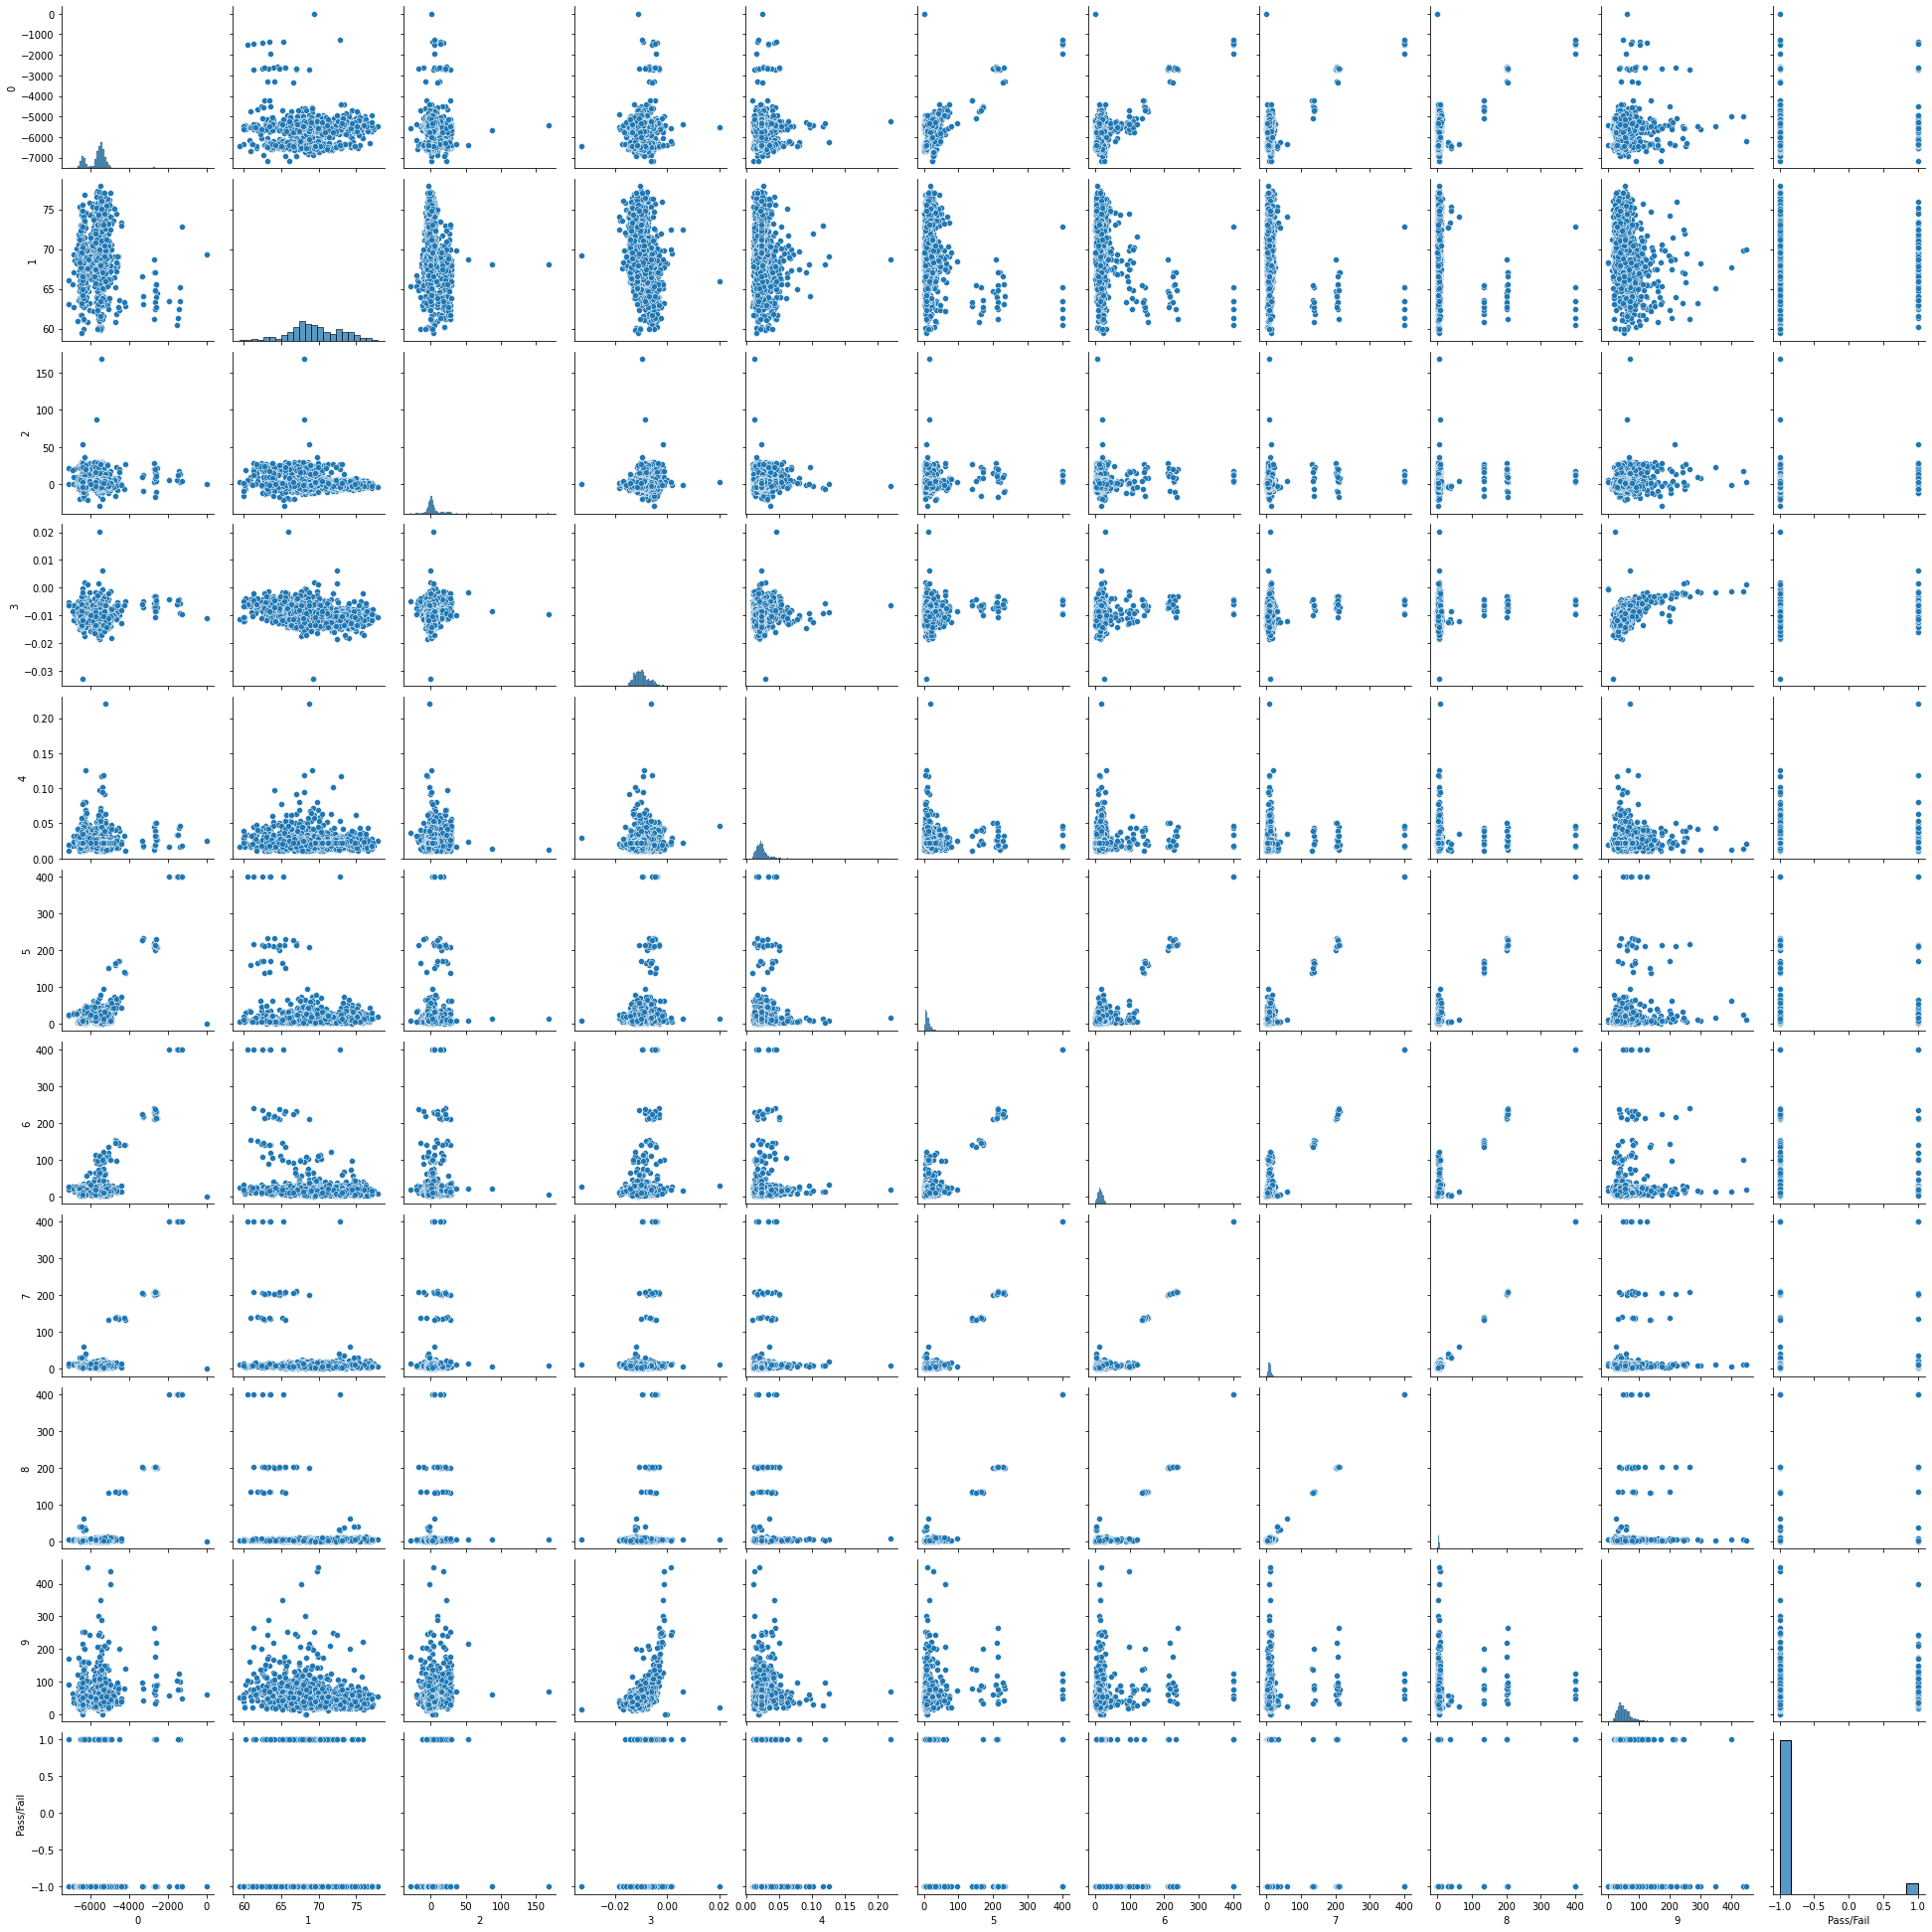

In [30]:
sns.pairplot(pd.DataFrame(total))

# Z score による外れ値

In [31]:
zscore_df = all_df.drop(['Time','Pass/Fail'], axis=1)
zscore_df = stats.zscore(zscore_df, nan_policy='omit')
for i in zscore_df.columns:
    zscore_df[i] = zscore_df[i].apply(lambda x: 1 if abs(x) >= 3 else 0)
zscore_df

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


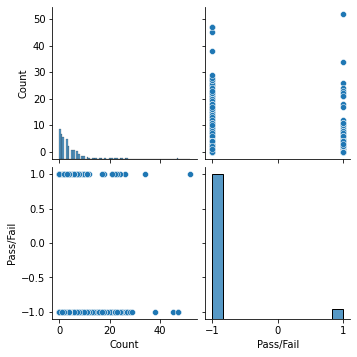

In [32]:
outlier_count = pd.DataFrame(zscore_df.sum(axis=1), columns=['Count'])
outlier_count['Pass/Fail'] = all_df['Pass/Fail']
sns.pairplot(outlier_count)